In [89]:
import pandas as pd
import numpy as np

df = pd.read_csv('churn.csv')
col_names = df.columns.tolist()

print(col_names)      

['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Churn', "Int'l Plan", 'VMail Plan', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Phone']


In [90]:
# Isolate target data
y = df['Churn']

In [91]:
to_drop = ['State','Area Code','Phone','Churn']
X = df.drop(to_drop,axis=1)

In [92]:
X.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [93]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [94]:
print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


In [95]:
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

算法 MLP 平均准确率: 94.089% 标准差: 0.014
算法 RF 平均准确率: 94.270% 标准差: 0.010
算法 GB 平均准确率: 95.290% 标准差: 0.012
算法 XGB 平均准确率: 95.290% 标准差: 0.011


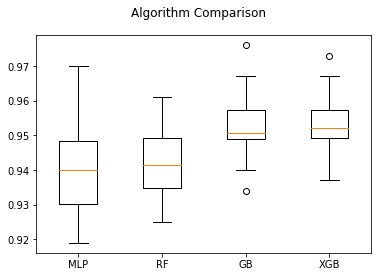

In [97]:
# prepare configuration for cross validation test harness
seed = 17
# prepare models
models = []
models.append(('MLP', MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 8), random_state=1)))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "算法 %s 平均准确率: %.3f%% 标准差: %.3f" % (name, cv_results.mean()*100., cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [114]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import itertools

In [116]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2798   52]
 [ 153  330]]
Normalized confusion matrix
[[ 0.98175439  0.01824561]
 [ 0.31677019  0.68322981]]
Confusion matrix, without normalization
[[2827   23]
 [ 148  335]]
Normalized confusion matrix
[[ 0.99192982  0.00807018]
 [ 0.30641822  0.69358178]]
Confusion matrix, without normalization
[[2815   35]
 [ 129  354]]
Normalized confusion matrix
[[ 0.9877193   0.0122807 ]
 [ 0.26708075  0.73291925]]
Confusion matrix, without normalization
[[2824   26]
 [ 136  347]]
Normalized confusion matrix
[[ 0.99087719  0.00912281]
 [ 0.2815735   0.7184265 ]]


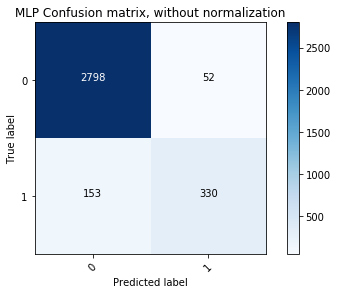

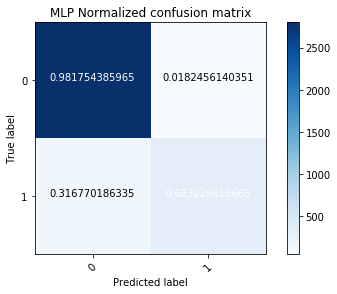

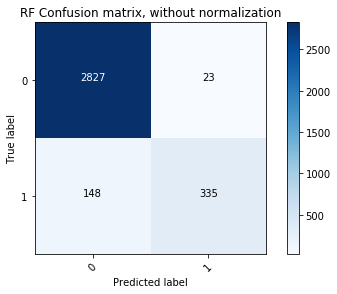

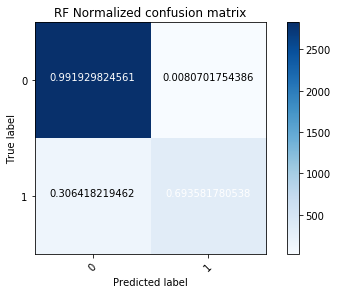

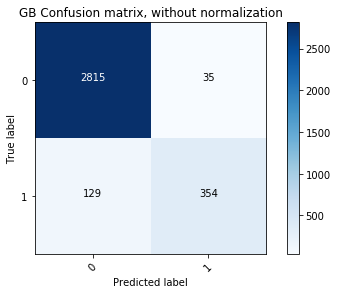

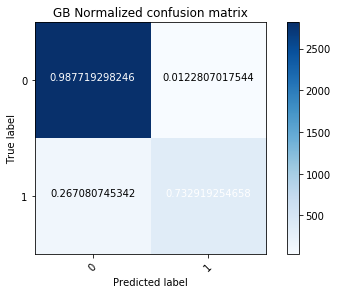

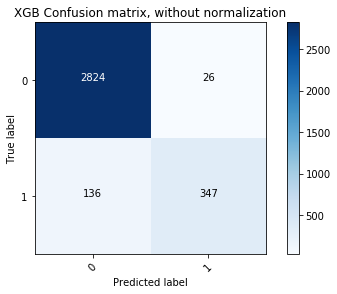

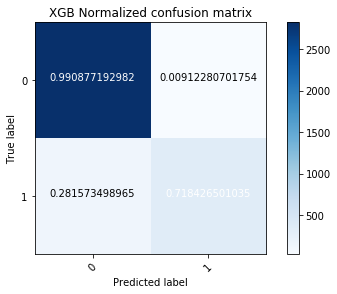

In [121]:
y = np.array(y)
class_names = np.unique(y)

for name, model in models:
    y_pred = cross_val_predict(model,X,y,cv=10)
    conf_mat = confusion_matrix(y,y_pred)    
    
    plt.figure()
    plot_confusion_matrix(conf_mat, classes=class_names,
                      title='{} Confusion matrix, without normalization'.format(name))
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(conf_mat, classes=class_names, normalize=True,
                      title= '{} Normalized confusion matrix'.format(name))

    #plt.show()